<a href="https://colab.research.google.com/github/JesusRobles97/DataAnalytics/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#              UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO
#              Facultad de Estudios Superiores Acatlán
#                    Materia: Miniería de Datos
# Proyecto final
# Integrantes del equipo:
# - Robles López Jesús Enrique
# - Aguillón Jiménez José Eduardo.
#Profesor: Gerardo Jacobo González León
# Grupo: 2801






#Entendimiento del caso de estudio

##Nosotros buscamos datos de la pandemia de COVID-19 en todos los países para poder ver y predecir mediante una regresión lineal múltiple la cantidad de muertos por esta enfermedad, entre las variables a estudiar se encuentran confirmados, muertos, recuperados, activos, así como los nuevos confirmados, nuevos recuperados y nuevos activos.
##Nuestra hipótesis es que la muerte va fuertemente ligada a los activos, confirmados y los recuperados.

#Entendimiento de los datos (EDA)

###Importamos librerías

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st

from pandas.api.types import is_string_dtype, is_numeric_dtype

###Cargamos los datos

In [ ]:
from google.colab import files
files.upload()

Saving DATOS.csv to DATOS (1).csv


{'DATOS.csv': b"Country/Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered\r\nAfghanistan,36263,1269,25198,9796,106,10,18\r\nAlbania,4880,144,2745,1991,117,6,63\r\nAlgeria,27973,1163,18837,7973,616,8,749\r\nAndorra,907,52,803,52,10,0,0\r\nAngola,950,41,242,667,18,1,0\r\nAntigua and Barbuda,86,3,65,18,4,0,5\r\nArgentina,167416,3059,72575,91782,4890,120,2057\r\nArmenia,37390,711,26665,10014,73,6,187\r\nAustralia,15303,167,9311,5825,368,6,137\r\nAustria,20558,713,18246,1599,86,1,37\r\nAzerbaijan,30446,423,23242,6781,396,6,558\r\nBahamas,382,11,91,280,40,0,0\r\nBahrain,39482,141,36110,3231,351,1,421\r\nBangladesh,226225,2965,125683,97577,2772,37,1801\r\nBarbados,110,7,94,9,0,0,0\r\nBelarus,67251,538,60492,6221,119,4,67\r\nBelgium,66428,9822,17452,39154,402,1,14\r\nBelize,48,2,26,20,0,0,0\r\nBenin,1770,35,1036,699,0,0,0\r\nBhutan,99,0,86,13,4,0,1\r\nBolivia,71181,2647,21478,47056,1752,64,309\r\nBosnia and Herzegovina,10498,294,4930,5274,731,14,375\r\nBotswana,739,2,

In [ ]:
data = pd.read_csv('DATOS.csv')
type(data)
print(data)

         Country/Region  Confirmed  Deaths  Recovered  Active  New_cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New_deaths  New_recovered  
0            10             18  
1             6      

In [ ]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered
0,Afghanistan,36263,1269,25198,9796,106,10,18
1,Albania,4880,144,2745,1991,117,6,63
2,Algeria,27973,1163,18837,7973,616,8,749
3,Andorra,907,52,803,52,10,0,0
4,Angola,950,41,242,667,18,1,0


###Copiamos los datos

In [ ]:
df = data.copy()
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered
0,Afghanistan,36263,1269,25198,9796,106,10,18
1,Albania,4880,144,2745,1991,117,6,63
2,Algeria,27973,1163,18837,7973,616,8,749
3,Andorra,907,52,803,52,10,0,0
4,Angola,950,41,242,667,18,1,0


###Escaneo Básico de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  187 non-null    object
 1   Confirmed       187 non-null    int64 
 2   Deaths          187 non-null    int64 
 3   Recovered       187 non-null    int64 
 4   Active          187 non-null    int64 
 5   New_cases       187 non-null    int64 
 6   New_deaths      187 non-null    int64 
 7   New_recovered   187 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 11.8+ KB


In [ ]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000


In [ ]:
df.isnull().sum()

Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New_cases         0
New_deaths        0
New_recovered     0
dtype: int64

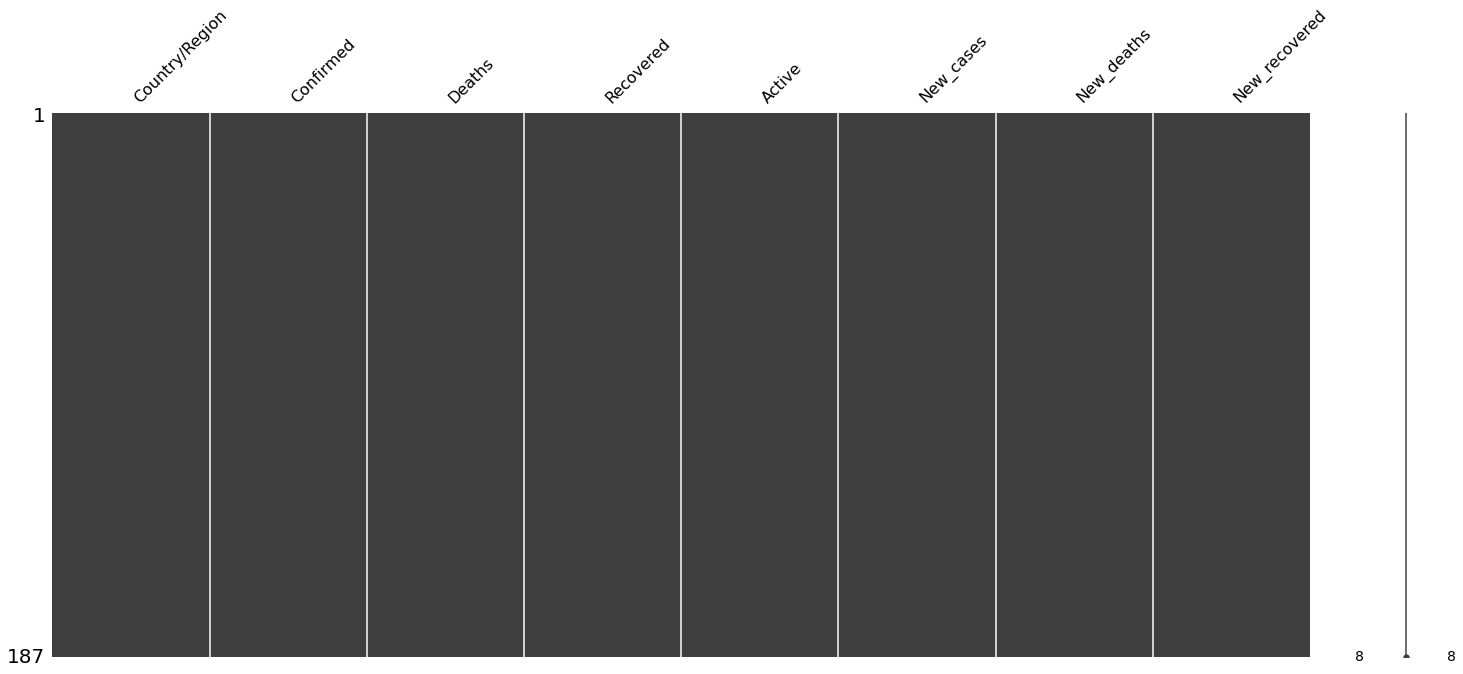

In [ ]:
msno.matrix(df)

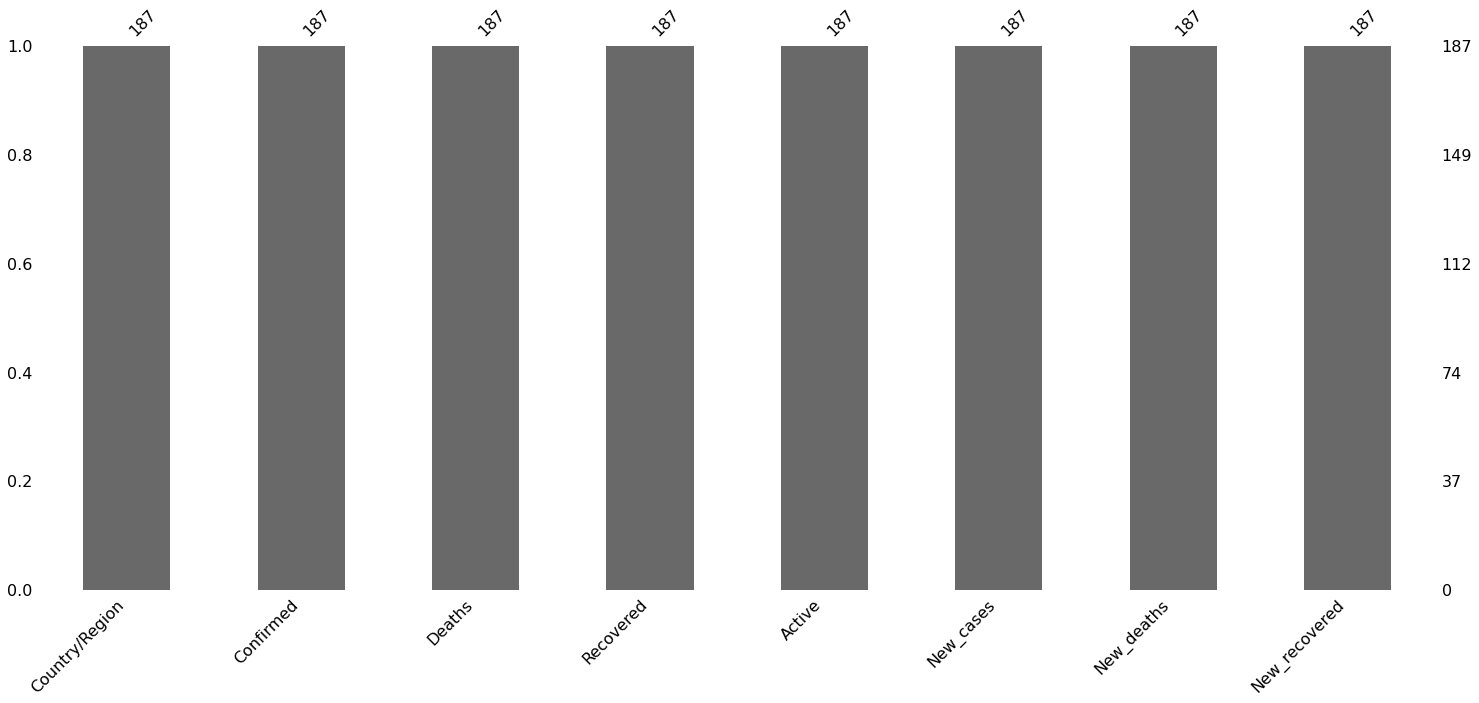

In [ ]:
msno.bar(df)

###Feature Engineering

In [ ]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered'],
      dtype='object')

In [ ]:
column = 'Deaths'
df[column]

0      1269
1       144
2      1163
3        52
4        41
       ... 
182      78
183       1
184     483
185     140
186      36
Name: Deaths, Length: 187, dtype: int64

###`title` → `title_length`

In [ ]:
Ku df['Deaths'].tail()

182     78
183      1
184    483
185    140
186     36
Name: Deaths, dtype: int64

In [ ]:
type(df['Deaths'])

pandas.core.series.Series

###Drop redundant variables

In [ ]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered'],
      dtype='object')

In [ ]:
numerical = []
categorical = []

for column in df:
  if is_numeric_dtype(df[column]):
    numerical.append(column)
  
  elif is_string_dtype(df[column]):
    categorical.append(column)

print('numerical variables: ', numerical)
print('categorical variables: ', categorical)

numerical variables:  ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New_cases', 'New_deaths', 'New_recovered']
categorical variables:  ['Country/Region']


###Análisis Univariado

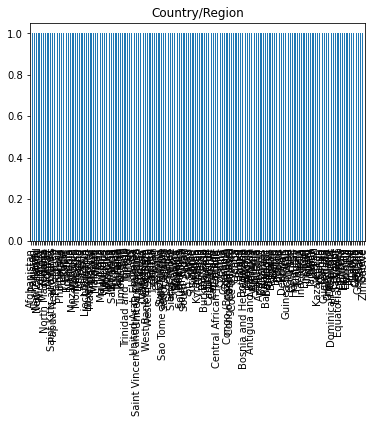

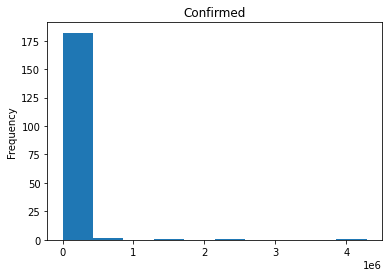

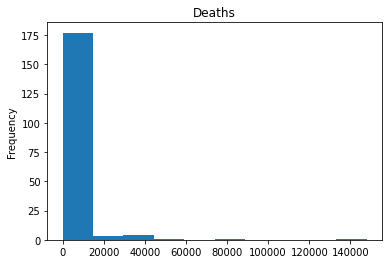

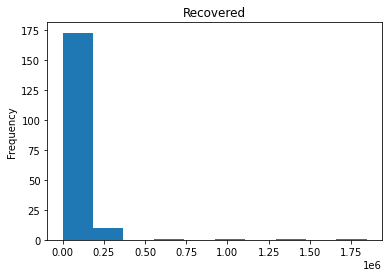

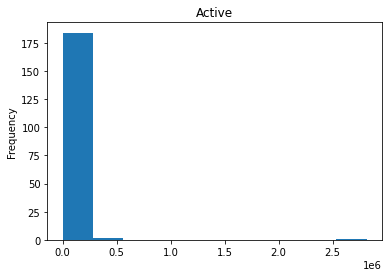

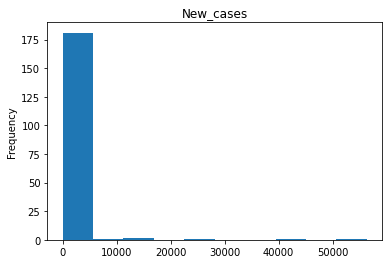

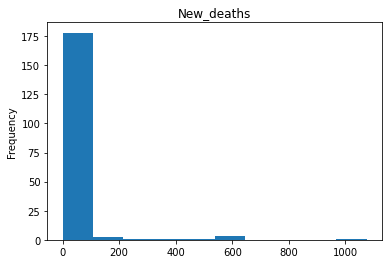

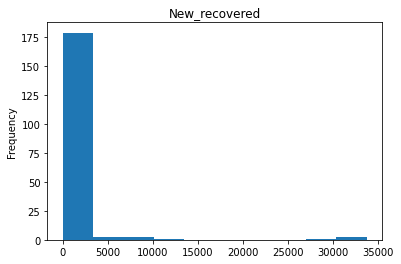

In [ ]:
for column in df:
  plt.figure(column)
  plt.title(column)

  # numerical variables → histogram
  if column in numerical:
    df[column].plot(kind='hist')

  # categorical variables → bar chart
  elif column in categorical:
    df[column].value_counts().plot(kind='bar')

###Análisis Multivariado

####Numerical vs Numerical

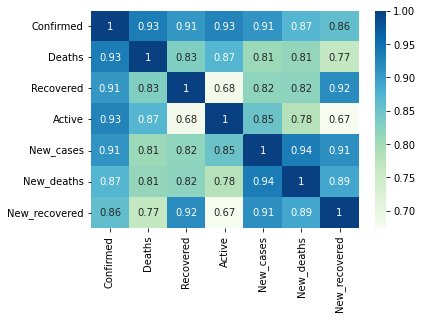

In [ ]:
# numerical vs numerical → heatmap
correlation = df.corr()
sns.heatmap(correlation, cmap='GnBu', annot=True)

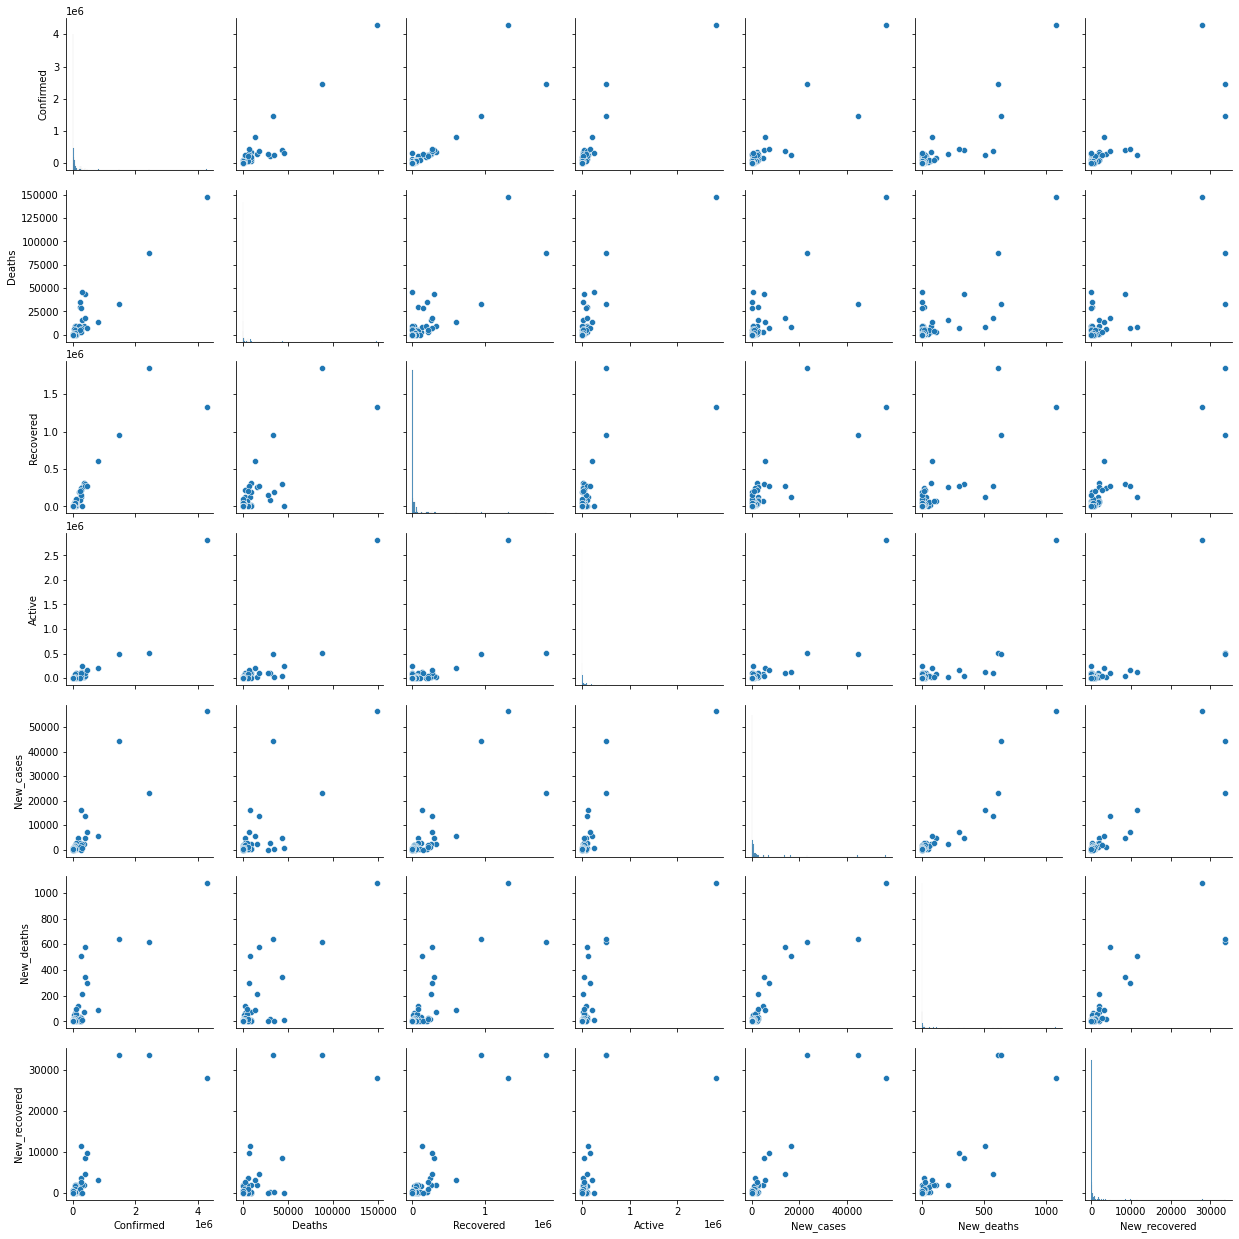

In [ ]:
# numerical vs numerical → pairplot
sns.pairplot(df, height=2.5)

#####Categorical vs numerical

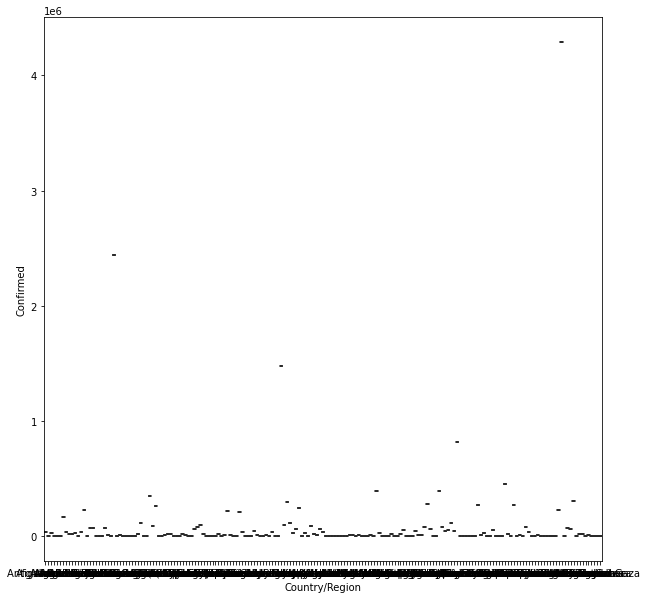

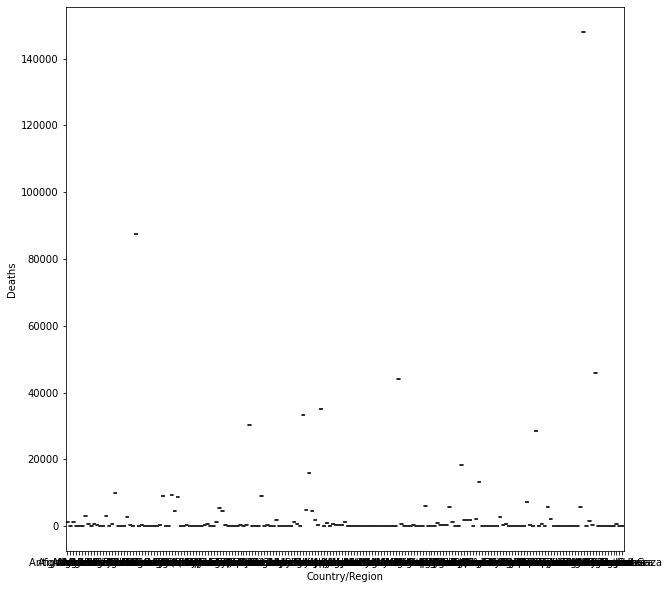

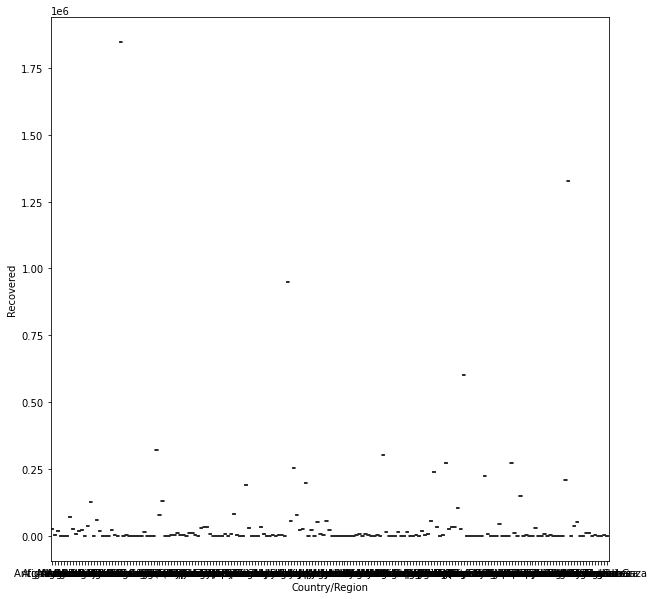

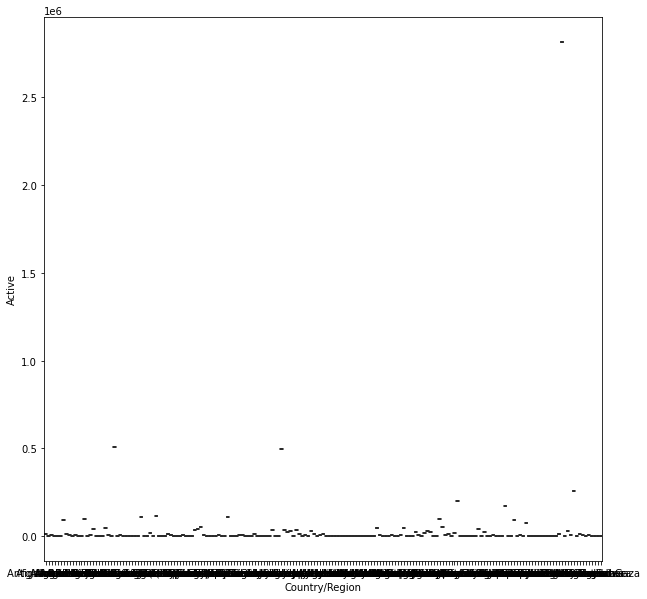

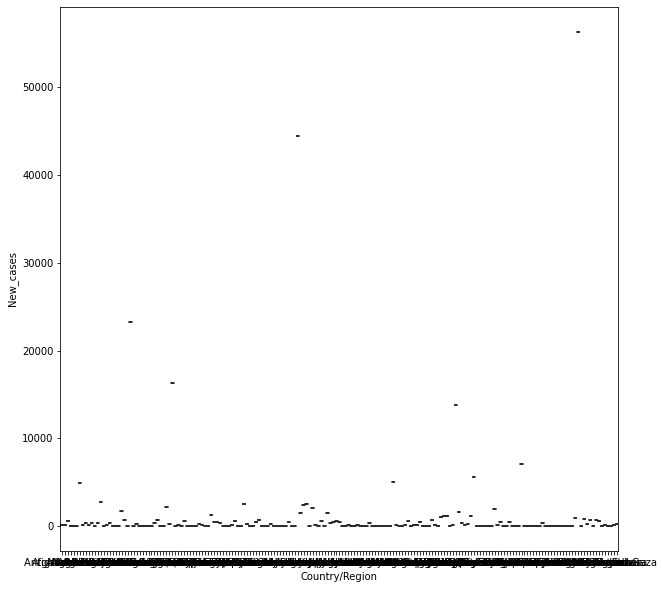

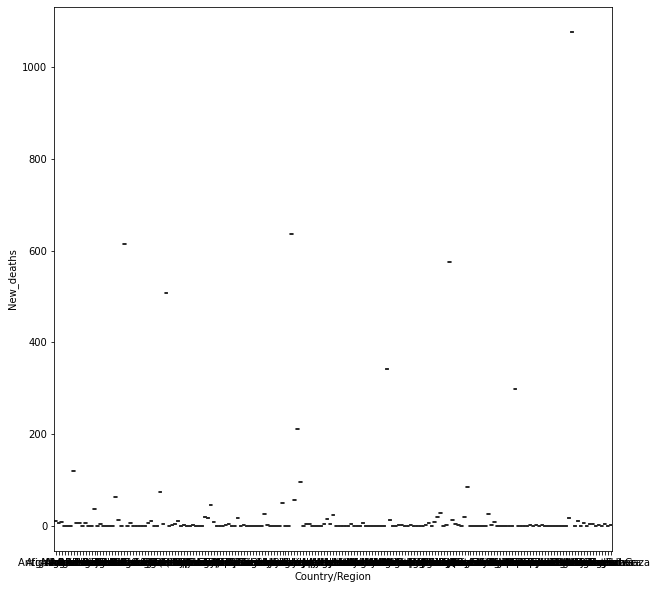

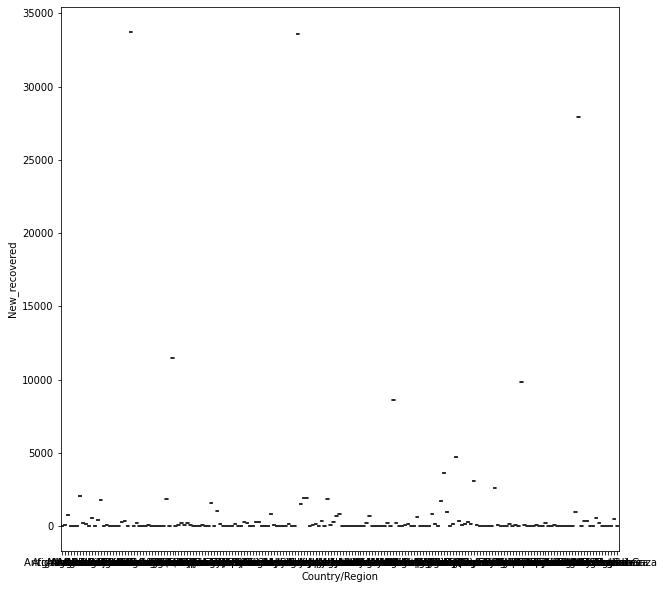

In [ ]:
# categorical vs numerical → boxplot

for i in range(0, len(categorical)):
  cat = categorical[i]
  for j in range(0, len(numerical)):
    num = numerical[j]
    plt.figure(figsize=(10,10))
    sns.boxplot(x=cat, y=num, data=df, palette='GnBu')

####Categorical vs categorical

In [ ]:
for i in range(0, len(categorical)):
  primary_cat = categorical[i]
  for j in range(0, len(categorical)):
    secondary_cat = categorical[j]
    if secondary_cat != primary_cat:
      plt.figure(figsize=(10,10))
      chart = sns.countplot(data=df, 
                            x=primary_cat, hue=secondary_cat,
                            palette='GnBu',
                            order=df[primary_cat].value_counts().iloc[:10].index)

#Preprocesamiento de datos


###Como preprocesamiento de datos, identificaremos los datos atípicos (Outliers)

####Primero obtenemos los boxplot de cada variable

{'boxes': [<matplotlib.lines.Line2D at 0x7f2c953145d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2c95354110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c95333190>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c95354c10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c952e9890>,
  <matplotlib.lines.Line2D at 0x7f2c952e9350>]}

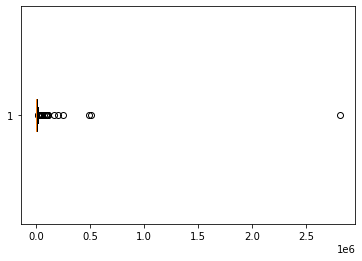

In [ ]:
plt.boxplot(df['Active'],vert=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2c952f3f10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2c9530df50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c95319fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c95319a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c9530d4d0>,
  <matplotlib.lines.Line2D at 0x7f2c9530da10>]}

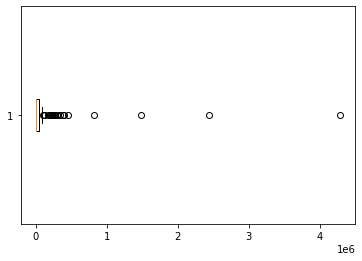

In [ ]:
plt.boxplot(df['Confirmed'],vert=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2c952e65d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2c9526d610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c95274690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c95274150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c952e6b50>,
  <matplotlib.lines.Line2D at 0x7f2c9526d0d0>]}

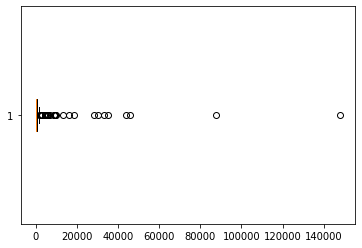

In [ ]:
plt.boxplot(df['Deaths'],vert=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2c9524bf90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2c95254fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c95264090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c9525cb10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c95254550>,
  <matplotlib.lines.Line2D at 0x7f2c95254a90>]}

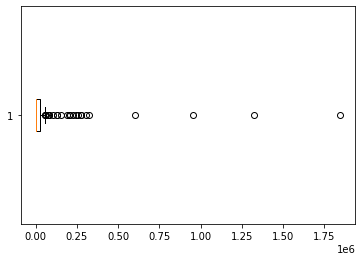

In [ ]:
plt.boxplot(df['Recovered'],vert=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2c951c4910>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2c951c8950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c951cf9d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c951cf490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c951c4e90>,
  <matplotlib.lines.Line2D at 0x7f2c951c8410>]}

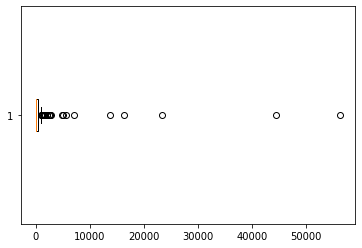

In [ ]:
plt.boxplot(df['New_cases'],vert=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2c95131690>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2c951366d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c9513d710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c9513d210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c95131c10>,
  <matplotlib.lines.Line2D at 0x7f2c951361d0>]}

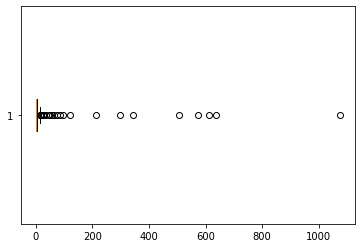

In [ ]:
plt.boxplot(df['New_deaths'],vert=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2c9511a3d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2c95121410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2c950a9450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2c95121f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2c9511a950>,
  <matplotlib.lines.Line2D at 0x7f2c9511aed0>]}

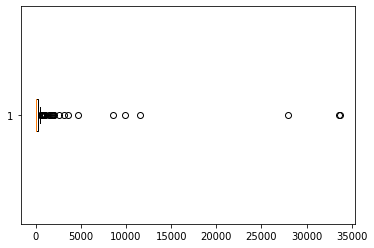

In [ ]:
plt.boxplot(df['New_recovered'],vert=False)

####Calculamos los estadísticos de los boxplot de cada variable

In [ ]:
Q1A = df['Active'].quantile(0.25)
print("Primer cuartil ",Q1A)
      
Q3A = df['Active'].quantile(0.75)
print("Tercer cuartil ",Q3A)

IQRA = Q3A - Q1A
print("Rango intercuartil ",IQRA)

MedianaA = df['Active'].median()
print("Mediana ",MedianaA)

valorMinimoA = df['Active'].min()
print("Valor Mínimo ",valorMinimoA)

valorMaximoA = df['Active'].max()
print("Valor Máximo ",valorMaximoA)

Primer cuartil  141.5
Tercer cuartil  9149.0
Rango intercuartil  9007.5
Mediana  1600.0
Valor Mínimo  0
Valor Máximo  2816444


In [ ]:
Q1C = df['Confirmed'].quantile(0.25)
print("Primer cuartil ",Q1C)
      
Q3C = df['Confirmed'].quantile(0.75)
print("Tercer cuartil ",Q3C)

IQRC = Q3C - Q1C
print("Rango intercuartil ",IQRC)

MedianaC = df['Confirmed'].median()
print("Mediana ",MedianaC)

valorMinimoC = df['Confirmed'].min()
print("Valor Mínimo ",valorMinimoC)

valorMaximoC = df['Confirmed'].max()
print("Valor Máximo ",valorMaximoC)

Primer cuartil  1114.0
Tercer cuartil  40460.5
Rango intercuartil  39346.5
Mediana  5059.0
Valor Mínimo  10
Valor Máximo  4290259


In [ ]:
Q1D = df['Deaths'].quantile(0.25)
print("Primer cuartil ",Q1D)
      
Q3D = df['Deaths'].quantile(0.75)
print("Tercer cuartil ",Q3D)

IQRD = Q3D - Q1D
print("Rango intercuartil ",IQRD)

MedianaD = df['Deaths'].median()
print("Mediana ",MedianaD)

valorMinimoD = df['Deaths'].min()
print("Valor Mínimo ",valorMinimoD)

valorMaximoD = df['Deaths'].max()
print("Valor Máximo ",valorMaximoD)

Primer cuartil  18.5
Tercer cuartil  734.0
Rango intercuartil  715.5
Mediana  108.0
Valor Mínimo  0
Valor Máximo  148011


In [ ]:
Q1NC = df['New_cases'].quantile(0.25)   
print("Primer cuartil ",Q1NC)

Q3NC = df['New_cases'].quantile(0.75)
print("Tercer cuartil ",Q3NC)

IQRNC = Q3NC - Q1NC
print("Rango intercuartil ",IQRNC)

MedianaNC = df['New_cases'].median()
print("Mediana ",MedianaNC)

valorMinimoNC = df['New_cases'].min()
print("Valor Mínimo ",valorMinimoNC)

valorMaximoNC = df['New_cases'].max()
print("Valor Máximo ",valorMaximoNC)

Primer cuartil  4.0
Tercer cuartil  419.5
Rango intercuartil  415.5
Mediana  49.0
Valor Mínimo  0
Valor Máximo  56336


In [ ]:
Q1ND = df['New_deaths'].quantile(0.25)  
print("Primer cuartil ",Q1ND)

Q3ND = df['New_deaths'].quantile(0.75)
print("Tercer cuartil ",Q3ND)

IQRND = Q3ND - Q1ND
print("Rango intercuartil ",IQRND)

MedianaND = df['New_deaths'].median()
print("Mediana ",MedianaND)

valorMinimoND = df['New_deaths'].min()
print("Valor Mínimo ",valorMinimoND)

valorMaximoND = df['New_deaths'].max()
print("Valor Máximo ",valorMaximoND)

Primer cuartil  0.0
Tercer cuartil  6.0
Rango intercuartil  6.0
Mediana  1.0
Valor Mínimo  0
Valor Máximo  1076


In [ ]:
Q1NR = df['New_recovered'].quantile(0.25)
print("Primer cuartil ",Q1NR)

Q3NR = df['New_recovered'].quantile(0.75)
print("Tercer cuartil ",Q3NR)

IQRNR = Q3NR - Q1NR
print("Rango intercuartil ",IQRNR)

MedianaNR = df['New_recovered'].median()
print("Mediana ",MedianaNR)

valorMinimoNR = df['New_recovered'].min()
print("Valor Mínimo ",valorMinimoNR)

valorMaximoNR = df['New_recovered'].max()
print("Valor Máximo ",valorMaximoNR)

Primer cuartil  0.0
Tercer cuartil  221.0
Rango intercuartil  221.0
Mediana  22.0
Valor Mínimo  0
Valor Máximo  33728


In [ ]:
Q1R = df['Recovered'].quantile(0.25)
print("Primer cuartil ",Q1R)

Q3R = df['Recovered'].quantile(0.75)
print("Tercer cuartil ",Q3R)

IQRR = Q3R - Q1R
print("Rango intercuartil ",IQRR)

MedianaR = df['Recovered'].median()
print("Mediana ",MedianaR)

valorMinimoR = df['Recovered'].min()
print("Valor Mínimo ",valorMinimoR)

valorMaximoR = df['Recovered'].max()
print("Valor Máximo ",valorMaximoR)

Primer cuartil  626.5
Tercer cuartil  22606.0
Rango intercuartil  21979.5
Mediana  2815.0
Valor Mínimo  0
Valor Máximo  1846641


#####Calculamos los valores de los bigotes inferior y superior

####Activos

In [ ]:
BI_CalculadoA=(Q1A-1.5*IQRA)
print("BI_Calculado \n",BI_CalculadoA)

BS_CalculadoA=(Q3A+1.5*IQRA)
print("BS_Calculado \n",BS_CalculadoA)

BI_Calculado 
 -13369.75
BS_Calculado 
 22660.25


####Confirmados

In [ ]:
BI_CalculadoC=(Q1C-1.5*IQRC)
print("BI_Calculado \n",BI_CalculadoC)

BS_CalculadoC=(Q3C+1.5*IQRC)
print("BS_Calculado \n",BS_CalculadoC)

BI_Calculado 
 -57905.75
BS_Calculado 
 99480.25


####Muertos

In [ ]:
BI_CalculadoD=(Q1D-1.5*IQRD)
print("BI_Calculado \n",BI_CalculadoD)

BS_CalculadoD=(Q3D+1.5*IQRD)
print("BS_Calculado \n",BS_CalculadoD)

BI_Calculado 
 -1054.75
BS_Calculado 
 1807.25


####Nuevos Casos

In [ ]:
BI_CalculadoNC=(Q1NC-1.5*IQRNC)
print("BI_Calculado \n",BI_CalculadoNC)

BS_CalculadoNC=(Q3NC+1.5*IQRNC)
print("BS_Calculado \n",BS_CalculadoNC)

BI_Calculado 
 -619.25
BS_Calculado 
 1042.75


####Nuevas Muertes

In [ ]:
BI_CalculadoND=(Q1ND-1.5*IQRND)
print("BI_Calculado \n",BI_CalculadoND)

BS_CalculadoND=(Q3ND+1.5*IQRND)
print("BS_Calculado \n",BS_CalculadoND)

BI_Calculado 
 -9.0
BS_Calculado 
 15.0


####Nuevos Recuperados

In [ ]:
BI_CalculadoNR=(Q1NR-1.5*IQRNR)
print("BI_Calculado \n",BI_CalculadoNR)

BS_CalculadoNR=(Q3NR+1.5*IQRNR)
print("BS_Calculado \n",BS_CalculadoNR)

BI_Calculado 
 -331.5
BS_Calculado 
 552.5


####Recuperados

In [ ]:
BI_CalculadoR=(Q1R-1.5*IQRR)
print("BI_Calculado \n",BI_CalculadoNR)

BS_CalculadoR=(Q3R+1.5*IQRR)
print("BS_Calculado \n",BS_CalculadoR)

BI_Calculado 
 -331.5
BS_Calculado 
 55575.25


####**Ubicamos los outliers**
###Ubicamos las filas en las que se encuentran los outliers.

####Activos

In [ ]:
outliers_Active=(df['Active'] < BI_CalculadoA) | (df['Active'] > BS_CalculadoA)
print("\nUbicacion de Outliers \n", outliers_Active)


Ubicacion de Outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Name: Active, Length: 187, dtype: bool


####Confirmados

In [ ]:
outliers_Confirmed=(df['Confirmed'] < BI_CalculadoC) | (df['Confirmed'] > BS_CalculadoC)
print("\nUbicacion de Outliers \n", outliers_Confirmed)


Ubicacion de Outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Name: Confirmed, Length: 187, dtype: bool


####Muertes

In [ ]:
outliers_Deaths=(df['Deaths'] < BI_CalculadoD) | (df['Deaths'] > BS_CalculadoD)
print("\nUbicacion de Outliers \n", outliers_Deaths)


Ubicacion de Outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Name: Deaths, Length: 187, dtype: bool


####Nuevos casos

In [ ]:
outliers_New_cases=(df['New_cases'] < BI_CalculadoNC) | (df['New_cases'] > BS_CalculadoNC)
print("\nUbicacion de Outliers \n", outliers_New_cases)


Ubicacion de Outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Name: New_cases, Length: 187, dtype: bool


####Nuevas Muertes

In [ ]:
outliers_New_deaths=(df['New_deaths'] < BI_CalculadoND) | (df['New_deaths'] > BS_CalculadoND)
print("\nUbicacion de Outliers \n", outliers_New_deaths)


Ubicacion de Outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Name: New_deaths, Length: 187, dtype: bool


####Nuevos recuperados

In [ ]:
outliers_New_recovered=(df['New_recovered'] < BI_CalculadoNR) | (df['New_recovered'] > BS_CalculadoNR)
print("\nUbicacion de Outliers \n", outliers_New_recovered)


Ubicacion de Outliers 
 0      False
1      False
2       True
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Name: New_recovered, Length: 187, dtype: bool


####Recuperados

In [ ]:
outliers_Recovered=(df['Recovered'] < BI_CalculadoR) | (df['Recovered'] > BS_CalculadoR)
print("\nUbicacion de Outliers \n", outliers_Recovered)


Ubicacion de Outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Name: Recovered, Length: 187, dtype: bool


#Modelado

##Para el modelado, planteamos realizar un modelo de regresión lineal múltiple

In [ ]:
model = smf.ols('Deaths~Confirmed+Recovered+Active+New_cases+New_deaths+New_recovered',df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.178e+30
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        19:34:33   Log-Likelihood:                 4104.6
No. Observations:                 187   AIC:                            -8195.
Df Residuals:                     180   BIC:                            -8173.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       3.38e-11   5.57e-12      6.071      0.000    2.28e-11    4.48e-11
Confirmed         1.0000   1.13e-15   8.82e+14      0.000       1.000       1.000
Recovered        -1.0000   1.17e-15  -8.53e+14      0.000      -1.000      -1.000
Active           -1.0000   1.19e-15  -8.38e+14      0.000      -1.000      -1.000
New_cases     -3.402e-15   5.23e-15     -0.651      0.516   -1.37e-14    6.91e-15
New_deaths      1.67e-13   1.39e-13      1.205      0.230   -1.06e-13     4.4e-13
New_recovered -1.591e-15   6.26e-15     -0.254      0.799   -1.39e-14    1.08e-14
==============================================================================
Omnibus:                      329.455   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64603.190
Skew:                           8.855   Prob(JB):                         0.00
Kurtosis:                      92.318   Cond. No.                     5.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####Correlación entre variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c9419f410>,
      dtype=object)

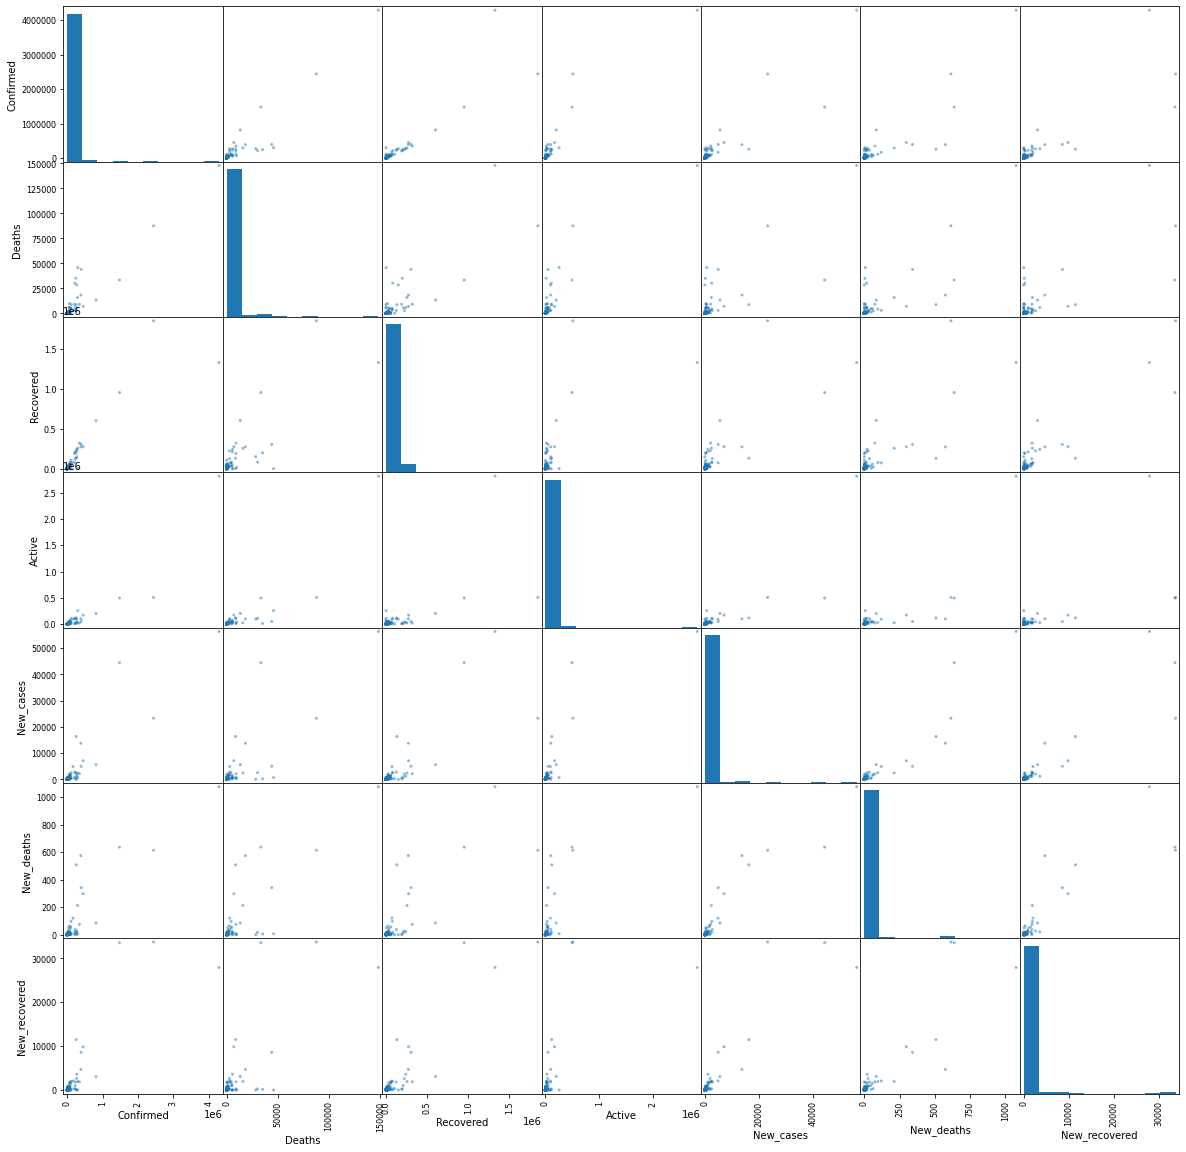

In [ ]:
pd.plotting.scatter_matrix(df,figsize=(20,20))

####VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from patsy import dmatrices
y ,  X=dmatrices('Deaths ~ Confirmed+Recovered+Active+New_cases+New_deaths+New_recovered',df,return_type="dataframe")
vif = pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["Variables"]=X.columns
vif.round(3)

,VIF,Variables
0,1.108,Intercept
1,6719.368,Confirmed
2,1768.012,Recovered
3,2305.208,Active
4,31.661,New_cases
5,9.834,New_deaths
6,24.523,New_recovered


####Gráficas de Residuos

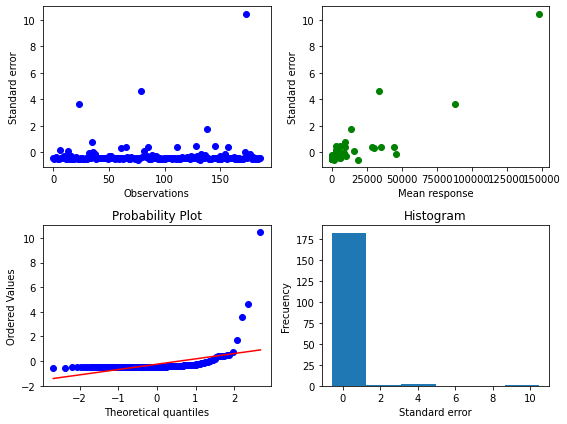

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(221)
ax.scatter(np.arange(len(df)),result.resid_pearson,color='blue')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(result.fittedvalues,result.resid_pearson,color='green')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(result.resid_pearson,plot=ax)

ax = fig.add_subplot(224)
ax.hist(result.resid_pearson,bins=6)
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()



####Test de White (Prueba de Heterocedasticidad)
####H0: Existe homocedasticidad en los residuos de las observaciones
####Ha: Existe heterocedasticidad en los residuos

In [ ]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(result.resid,result.model.exog)
labels = {'LM Statistic','LM-Test p-value','F-Statistic','F-Test p-value'}
print(dict(zip(labels,white_test)))

{'LM-Test p-value': 186.99740041549717, 'LM Statistic': 7.202607032443486e-26, 'F-Statistic': 423608.8160836891, 'F-Test p-value': 0.0}


####Test de Jarque-Bera (Prueba de Normalidad)
####H0: Los residuos se distribuyen normalmente
####Ha: Los residuos no se distribuyen normalmente
####Prob(JB) = 0.00


####Modelo de Regresión múltiple - Variables significativas

In [ ]:
model = smf.ols('Deaths ~ Confirmed + Recovered + Active',df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.067e+30
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        19:36:05   Log-Likelihood:                 4029.0
No. Observations:                 187   AIC:                            -8050.
Df Residuals:                     183   BIC:                            -8037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.061e-12   8.18e-12      0.252      0.801   -1.41e-11    1.82e-11
Confirmed      1.0000   1.52e-15   6.57e+14      0.000       1.000       1.000
Recovered     -1.0000   1.57e-15  -6.35e+14      0.000      -1.000      -1.000
Active        -1.0000   1.58e-15  -6.33e+14      0.000      -1.000      -1.000
==============================================================================
Omnibus:                      328.222   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60245.748
Skew:                          -8.830   Prob(JB):                         0.00
Kurtosis:                      89.141   Cond. No.                     4.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from patsy import dmatrices
y ,  X=dmatrices('Deaths ~ Confirmed + Recovered + Active',df,return_type="dataframe")
vif = pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["Variables"]=X.columns
vif.round(3)

,VIF,Variables
0,1.084,Intercept
1,5483.632,Confirmed
2,1442.211,Recovered
3,1830.296,Active


####Gráfica de residuos

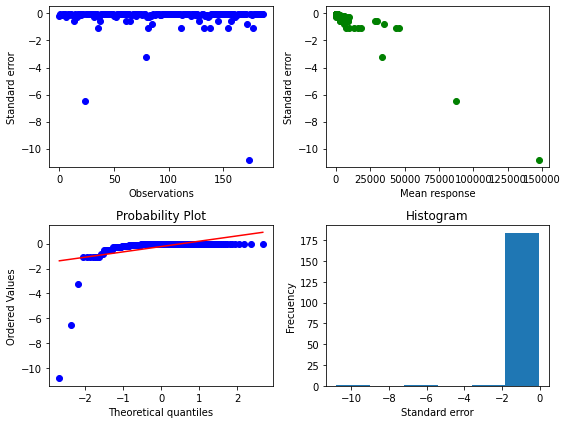

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(221)
ax.scatter(np.arange(len(df)),result.resid_pearson,color='blue')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(result.fittedvalues,result.resid_pearson,color='green')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(result.resid_pearson,plot=ax)

ax = fig.add_subplot(224)
ax.hist(result.resid_pearson,bins=6)
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()


####Prueba de Heterocedasticidad

In [ ]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(result.resid,result.model.exog)
labels = {'LM Statistic','LM-Test p-value','F-Statistic','F-Test p-value'}
print(dict(zip(labels,white_test)))

{'LM-Test p-value': 186.96510818165893, 'LM Statistic': 1.7755957376293202e-35, 'F-Statistic': 105382.31126178108, 'F-Test p-value': 0.0}


####Prueba de Normalidad

####Prob(JB) = 0.00

#Evaluación del modelo

##Para corroborar que el modelo de regresión lineal sea el adecuado, probamos los supuestos de Heterocedasticidad y el de Normalidad

####Test de White (Prueba de Heterocedasticidad)
####H0: Existe homocedasticidad en los residuos de las observaciones
####Ha: Existe heterocedasticidad en los residuos

####Test de Jarque-Bera (Prueba de Normalidad)
####H0: Los residuos se distribuyen normalmente
####Ha: Los residuos no se distribuyen normalmente
####Prob(JB) = 0.00


#Validación del modelo

##Para la validación del modelo, planteamos que son 100,000,000 de casos confirmados, 50,000 de casos recuperados y 800,000 de casos activos.

In [ ]:
Deaths =2.061e-12 + (100000000)-50000-800000

##Ahora tenemos que nuestro resultado de muertes que predecimos con los valores anteriores, por lo que nos resulta una cantidad de muertes de 

In [ ]:
Deaths

99150000.0